In [12]:
from src.utils import get_project_root
import os 

root = get_project_root()
raw_data_path = os.path.join(root, 'data', 'raw', 'election')
json_data_path = os.path.join(root, 'data', 'processed', 'election')

In [13]:
from src.similarity import *
import pandas as pd
import json
from src.similarity import *
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


normalization: ignores frequency (does not change)  
uncasing: ignores spelling(least meaningful)  
filter: ignores "neutral" hashtags  
n_neighbors: as name suggests

In [14]:
config = json.load(open('config/vector_compile.json'))
kws = config['keywords']
save_path = config['save_path']
vector_fp = config['vector_fp']
users_fp = config['user_fp']
fig_path = config['fig_path']
users_fp = '../q2_data/news/'
vector = pd.read_json('vector.json', typ = 'series')

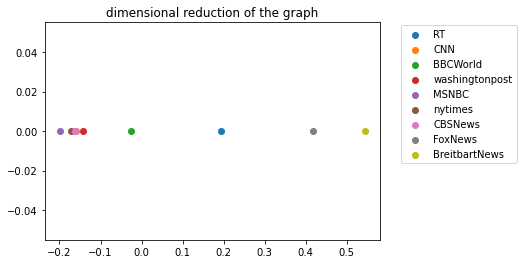

In [31]:
plot_embedding(users_fp, vector, save_path, use_local=True, fig_path=None)

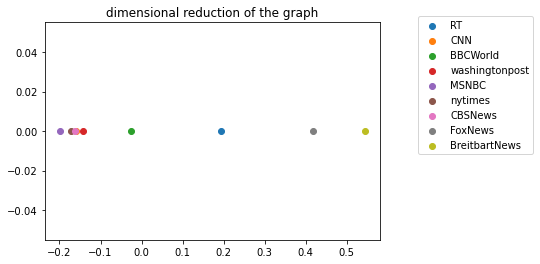

In [21]:
plot_embedding(users_fp, vector, save_path, use_local=True, fig_path=None)

In [16]:
plt.savefig('what.png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

../q2_data/news/RT_America_500_users.jsonl
../q2_data/news/CNN_500_users.jsonl
../q2_data/news/BBCWorld_500_users.jsonl
../q2_data/news/washingtonpost_500_users.jsonl
../q2_data/news/MSNBC_500_users.jsonl
../q2_data/news/nytimes_500_users.jsonl
../q2_data/news/CBSNews_500_users.jsonl
../q2_data/news/FoxNews_500_users.jsonl
../q2_data/news/BreitbartNews_500_users.jsonl


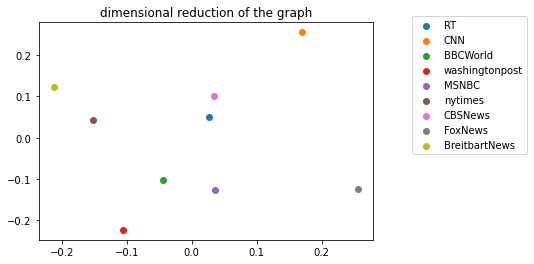

In [19]:
plot_embedding(users_fp, vector, save_path, normalize=True, dim=2)

# Comparison 2: unnormalized

In [22]:
plot_embedding(users_fp, vector, save_path, normalize=False)

TypeError: plot_embedding() missing 1 required positional argument: 'fig_path'

../q2_data/news/RT_America_500_users.jsonl
../q2_data/news/CNN_500_users.jsonl
../q2_data/news/BBCWorld_500_users.jsonl
../q2_data/news/washingtonpost_500_users.jsonl
../q2_data/news/MSNBC_500_users.jsonl
../q2_data/news/nytimes_500_users.jsonl
../q2_data/news/CBSNews_500_users.jsonl
../q2_data/news/FoxNews_500_users.jsonl
../q2_data/news/BreitbartNews_500_users.jsonl


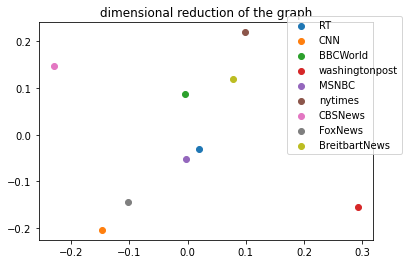

In [11]:
plot_embedding(users_fp, vector, save_path, normalize=False, dim=2)

# Comparison 3: normalized and keywords

../q2_data/news/RT_America_500_users.jsonl
../q2_data/news/CNN_500_users.jsonl
../q2_data/news/BBCWorld_500_users.jsonl
../q2_data/news/washingtonpost_500_users.jsonl
../q2_data/news/MSNBC_500_users.jsonl
../q2_data/news/nytimes_500_users.jsonl
../q2_data/news/CBSNews_500_users.jsonl
../q2_data/news/FoxNews_500_users.jsonl
../q2_data/news/BreitbartNews_500_users.jsonl


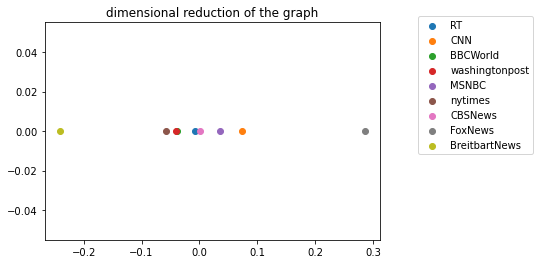

In [5]:
plot_embedding(users_fp, vector, save_path, fig_path=fig_path, normalize=True, kws = kws, top_k = None)

In [16]:
news, adjacency = construct_jaccard(json.load(open('news_vectors.json')))

In [17]:
adjacency

array([[1.        , 0.14115821, 0.18753728, 0.16549158, 0.11985856,
        0.16975339, 0.15771574, 0.21987749, 0.17322864],
       [0.14115821, 1.        , 0.23680503, 0.31280774, 0.22592225,
        0.26933865, 0.24418864, 0.14843927, 0.11877297],
       [0.18753728, 0.23680503, 1.        , 0.21479121, 0.10740884,
        0.21453905, 0.16216185, 0.18193014, 0.11764898],
       [0.16549158, 0.31280774, 0.21479121, 1.        , 0.24968982,
        0.27196628, 0.29594058, 0.19895992, 0.16130241],
       [0.11985856, 0.22592225, 0.10740884, 0.24968982, 1.        ,
        0.22147543, 0.21428025, 0.12895909, 0.11413895],
       [0.16975339, 0.26933865, 0.21453905, 0.27196628, 0.22147543,
        1.        , 0.2360046 , 0.17406567, 0.11137591],
       [0.15771574, 0.24418864, 0.16216185, 0.29594058, 0.21428025,
        0.2360046 , 1.        , 0.16675804, 0.12741811],
       [0.21987749, 0.14843927, 0.18193014, 0.19895992, 0.12895909,
        0.17406567, 0.16675804, 1.        , 0.31501862],


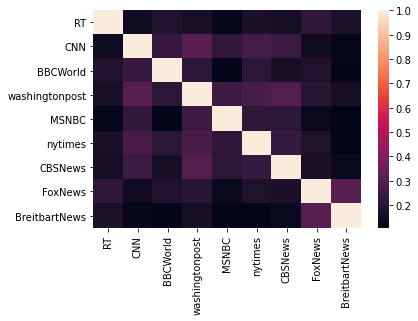

In [44]:
sns.heatmap(adjacency, xticklabels=news, yticklabels=news)
plt.savefig('what.png')

In [20]:
news

['RT',
 'CNN',
 'BBCWorld',
 'washingtonpost',
 'MSNBC',
 'nytimes',
 'CBSNews',
 'FoxNews',
 'BreitbartNews']

In [22]:
results = embed(adjacency)

In [24]:
results

array([[ 0.26697254],
       [-0.23955911],
       [ 0.00359283],
       [-0.16144952],
       [-0.23710697],
       [-0.18427105],
       [-0.17281329],
       [ 0.41921008],
       [ 0.49766565]])

RT [array([0.26697254]), 0]
CNN [array([-0.23955911]), 0]
BBCWorld [array([0.00359283]), 0]
washingtonpost [array([-0.16144952]), 0]
MSNBC [array([-0.23710697]), 0]
nytimes [array([-0.18427105]), 0]
CBSNews [array([-0.17281329]), 0]
FoxNews [array([0.41921008]), 0]
BreitbartNews [array([0.49766565]), 0]


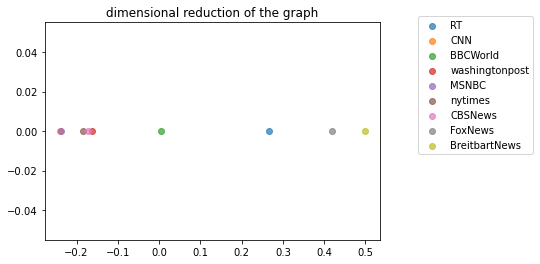

In [38]:
for i in range(len(results)):
    coord = results[i]
    plt.scatter(*[coord,0], label = news[i], alpha = 0.7)
    print(news[i],[coord,0])

# plt.scatter(-0.23955911, 0, label = 'where is it')
plt.title('dimensional reduction of the graph')
plt.legend(bbox_to_anchor=(1.1, 1.05))


In [28]:
plt.close()

../q2_data/news/RT_America_500_users.jsonl
../q2_data/news/CNN_500_users.jsonl
../q2_data/news/BBCWorld_500_users.jsonl
../q2_data/news/washingtonpost_500_users.jsonl
../q2_data/news/MSNBC_500_users.jsonl
../q2_data/news/nytimes_500_users.jsonl
../q2_data/news/CBSNews_500_users.jsonl
../q2_data/news/FoxNews_500_users.jsonl
../q2_data/news/BreitbartNews_500_users.jsonl


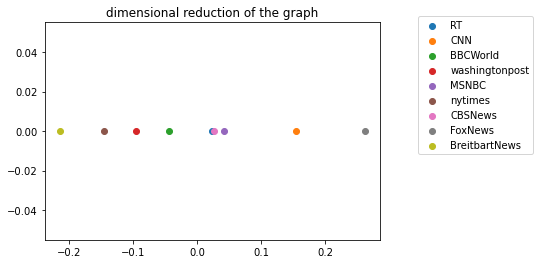

In [10]:
plot_embedding(users_fp, vector, save_path, normalize=True, kws = kws)

../q2_data/news/RT_America_500_users.jsonl
../q2_data/news/CNN_500_users.jsonl
../q2_data/news/BBCWorld_500_users.jsonl
../q2_data/news/washingtonpost_500_users.jsonl
../q2_data/news/MSNBC_500_users.jsonl
../q2_data/news/nytimes_500_users.jsonl
../q2_data/news/CBSNews_500_users.jsonl
../q2_data/news/FoxNews_500_users.jsonl
../q2_data/news/BreitbartNews_500_users.jsonl


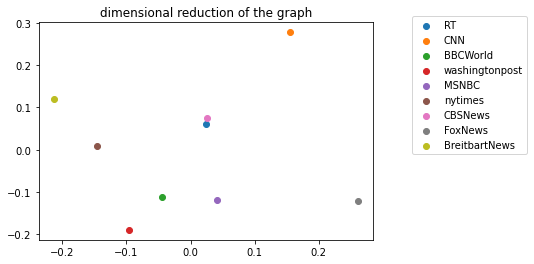

In [9]:
plot_embedding(users_fp, vector, save_path, normalize=True, kws = kws, dim=2)

../q2_data/news/RT_America_500_users.jsonl
../q2_data/news/CNN_500_users.jsonl
../q2_data/news/BBCWorld_500_users.jsonl
../q2_data/news/washingtonpost_500_users.jsonl
../q2_data/news/MSNBC_500_users.jsonl
../q2_data/news/nytimes_500_users.jsonl
../q2_data/news/CBSNews_500_users.jsonl
../q2_data/news/FoxNews_500_users.jsonl
../q2_data/news/BreitbartNews_500_users.jsonl


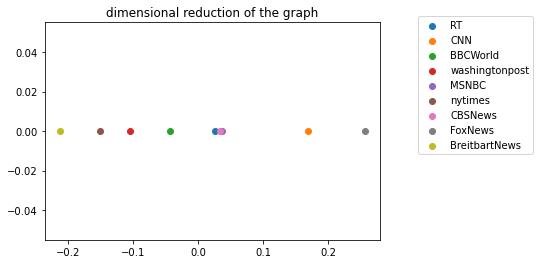

In [6]:
plot_embedding(users_fp, vector, save_path, normalize=True, kws = None, n_neighbors = 3)